[*********************100%***********************]  1 of 1 completed
Epoch 1/100
42/42 [==============================] - 5s 10ms/step - loss: 0.0087
Epoch 2/100
42/42 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 3/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 7/100
42/42 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 8/100
42/42 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 9/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 10/100
42/42 [==============================] - 1s 23ms/step - loss: 0.0011
Epoch 11/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 12/100
42/42 [==================

<Axes: xlabel='Date'>

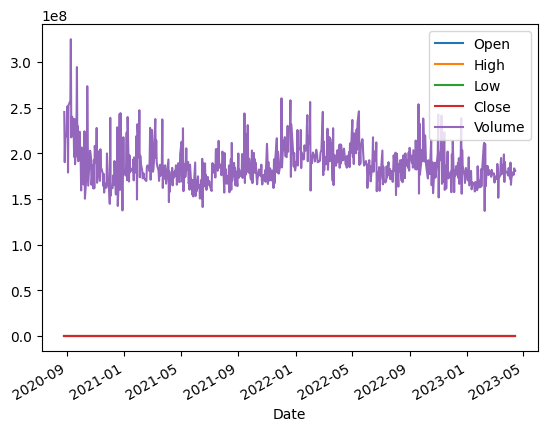

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Downloading the historical stock prices for a given ticker
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2023-04-17")

# Selecting only the relevant columns
data = data[["Open", "High", "Low", "Close", "Volume"]]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Creating the input and output sequences for the LSTM
def create_sequences(dataset, seq_length):
    X, Y = [], []
    for i in range(len(dataset)-seq_length-1):
        X.append(dataset[i:(i+seq_length), :])
        Y.append(dataset[i+seq_length, :])
    return np.array(X), np.array(Y)

seq_length = 5
train_X, train_Y = create_sequences(train_data, seq_length)
test_X, test_Y = create_sequences(test_data, seq_length)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 5)))
model.add(LSTM(50))
model.add(Dense(5))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(train_X, train_Y, epochs=100, batch_size=64)

# Predicting the test set results
predicted_data = model.predict(test_X)
predicted_data = scaler.inverse_transform(predicted_data)

# Visualizing the results
data_for_plotting = data[-len(test_X):].reset_index()
data_for_plotting["Open"] = predicted_data[:, 0]
data_for_plotting["High"] = predicted_data[:, 1]
data_for_plotting["Low"] = predicted_data[:, 2]
data_for_plotting["Close"] = predicted_data[:, 3]
data_for_plotting["Volume"] = predicted_data[:, 4]

data_for_plotting.plot(x="Date", y=["Open", "High", "Low", "Close", "Volume"])



In [ ]:
print(len(data_for_plotting['Date']))

663


In [ ]:
data=data.tail(len(data_for_plotting['Date']))

In [ ]:
print(data_for_plotting)

          Date        Open        High         Low       Close       Volume
0   2020-08-26  121.953827  124.314507  119.165916  121.850037  245158432.0
1   2020-08-27  123.303703  125.195946  120.739067  123.248177  190204096.0
2   2020-08-28  124.652718  126.516083  121.860764  124.668785  216095568.0
3   2020-08-31  125.192688  127.152100  122.373993  125.247421  221440096.0
4   2020-09-01  125.428703  127.683868  122.443909  125.662628  246453712.0
..         ...         ...         ...         ...         ...          ...
658 2023-04-10  164.487442  167.005142  159.808517  164.138504  179511744.0
659 2023-04-11  164.140717  166.664352  159.539597  163.889282  176506176.0
660 2023-04-12  163.022430  165.634537  158.464920  162.932266  183388752.0
661 2023-04-13  162.284332  164.885574  157.773026  162.195999  180745552.0
662 2023-04-14  161.519211  164.111206  157.027374  161.408585  180672224.0

[663 rows x 6 columns]


In [ ]:
print(data)

                  Open        High         Low       Close     Volume
Date                                                                 
2020-08-26  126.180000  126.992500  125.082497  126.522499  163022400
2020-08-27  127.142502  127.485001  123.832497  125.010002  155552400
2020-08-28  126.012497  126.442497  124.577499  124.807503  187630000
2020-08-31  127.580002  131.000000  126.000000  129.039993  225702700
2020-09-01  132.759995  134.800003  130.529999  134.179993  151948100
...                ...         ...         ...         ...        ...
2023-04-10  161.419998  162.029999  160.080002  162.029999   47716900
2023-04-11  162.350006  162.360001  160.509995  160.800003   47644200
2023-04-12  161.220001  162.059998  159.779999  160.100006   50133100
2023-04-13  161.630005  165.800003  161.419998  165.559998   68445600
2023-04-14  164.589996  166.320007  163.820007  165.210007   49337200

[663 rows x 5 columns]


<Axes: xlabel='Date'>

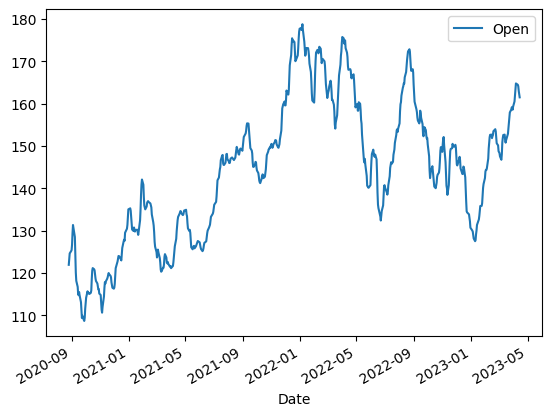

In [ ]:
data_for_plotting.plot(x="Date", y=["Open"])


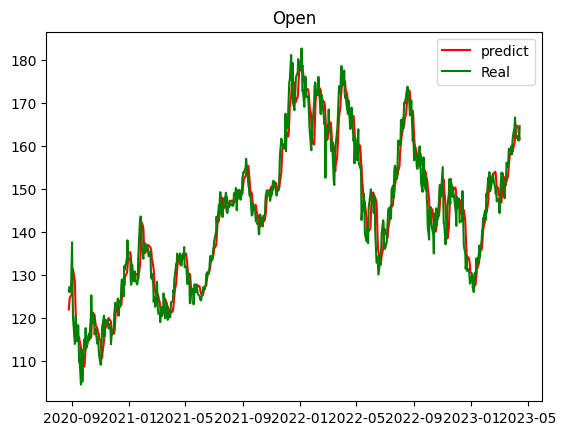

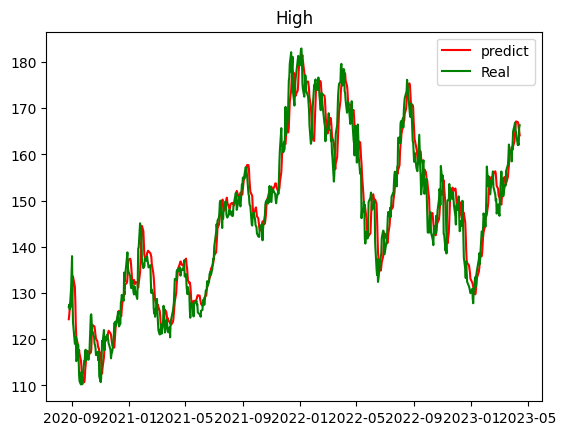

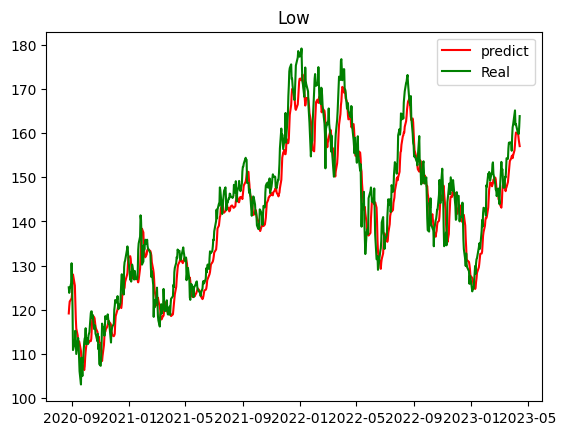

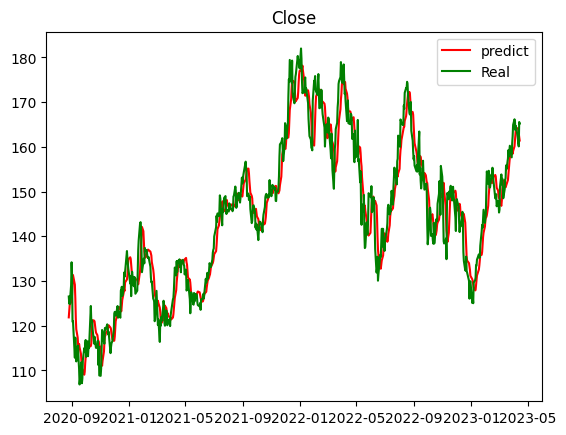

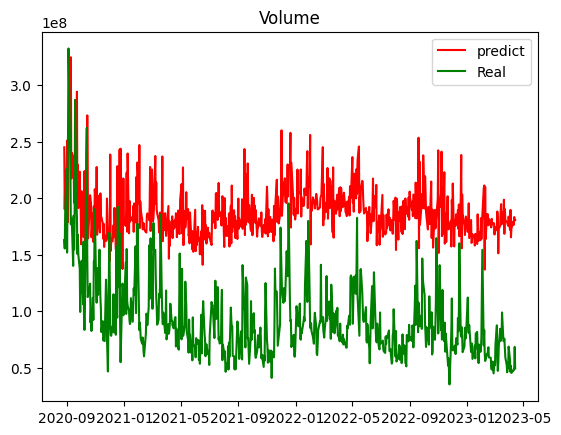

In [ ]:
data_for_plotting = data_for_plotting.set_index('Date')
# df2 = df2.set_index('Date')

# Plot data
import matplotlib.pyplot as plt
for i in data.columns:
  plt.plot(data_for_plotting[i], color='red', label='predict')
  plt.plot(data[i], color='green', label='Real')
  plt.title(i)
  plt.legend()
  plt.show()